In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h1>Load the data into a dataframe</h1>

In [37]:
df_annotations = pd.read_csv("task_2_annotations_82d1d6d1093eaab6_e330cbf_generic.csv")
df_annotations

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
1,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
2,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
3,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
4,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3
2634,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1
2635,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2
2636,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1


<h2>Aggregate the data</h2>

In [38]:

aggregate = df_annotations[["pianist_id", "segment_id"]].value_counts().index

In [39]:
df_annotations["aggregate"] = ""
idx = 0
for i in aggregate:
    idx +=1
    df_annotations["aggregate"].loc[(df_annotations["pianist_id"] == i[0]) & (df_annotations["segment_id"] == i[1])] = idx

<h1>GEMS9</h1>
<h2>Create data frame for GEMS9 annotations</h2>

In [76]:
df_gems = df_annotations[["aggregate", "arousal", "valence", "gems_wonder", "gems_transcendence", "gems_tenderness", "gems_nostalgia", "gems_peacefulness", "gems_power", "gems_joyful_activation", "gems_tension", "gems_sadness"]]
df_gems

,aggregate,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness
0,1,1,-1,2,1,2,4,2.0,1,1,1,2
1,1,2,-1,3,3,3,4,4.0,1,2,3,3
2,1,2,0,2,1,2,1,4.0,2,2,1,1
3,1,2,2,4,5,2,3,5.0,2,4,1,3
4,1,4,2,3,5,2,3,3.0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2633,42,3,-1,3,2,1,4,1.0,3,2,3,5
2634,42,2,0,2,2,2,3,3.0,3,1,3,1
2635,42,2,1,2,1,1,2,2.0,2,2,1,1
2636,42,2,0,2,1,2,2,1.0,3,4,3,2


<h2>Group data by the aggregated column and take the variance</h2>

In [210]:
df_gems_grouped = df_gems.groupby(["aggregate"]).var()
df_gems_grouped

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness
aggregate,,,,,,,,,,,
1,1.290909,1.163636,1.018182,2.163636,0.890909,1.218182,0.872727,1.690909,1.254545,1.490909,1.054545
2,0.963636,0.563636,2.000000,1.690909,1.054545,2.454545,0.454545,1.890909,1.290909,0.690909,1.818182
3,1.254545,1.054545,1.072727,1.654545,0.854545,1.018182,1.054545,1.218182,0.454545,1.054545,1.490909
4,0.763636,0.254545,0.563636,1.672727,1.618182,0.472727,0.472727,0.618182,0.618182,0.618182,0.272727
5,0.818182,0.872727,1.563636,1.563636,1.490909,1.072727,0.854545,0.872727,1.072727,0.418182,0.163636
...,...,...,...,...,...,...,...,...,...,...,...
293,0.800000,0.400000,2.966667,2.966667,1.366667,2.166667,1.066667,1.500000,0.700000,0.700000,0.266667
294,1.866667,0.966667,1.766667,0.700000,0.566667,2.266667,2.566667,1.366667,1.066667,2.266667,0.266667
295,2.666667,0.266667,2.300000,2.966667,1.866667,0.666667,3.600000,1.766667,1.766667,0.666667,0.166667


<h2>Calculate the mean/std/var of the GEMS annoatations in a new column from variance grouped data</h2>

In [218]:
col = df_gems_grouped.loc[: , "gems_wonder":"gems_sadness"]
df_gems_grouped['mean'] = col.mean(axis=1)
df_gems_grouped['std'] = col.std(axis=1)
df_gems_grouped['var'] = col.var(axis=1)
df_gems_grouped[['mean', 'std', 'var']]

,mean,std,var
aggregate,,,
1,1.294949,0.423267,0.179155
2,1.482828,0.655625,0.429844
3,1.096970,0.346887,0.120331
4,0.769697,0.508685,0.258760
5,1.008081,0.495193,0.245216
...,...,...,...
293,1.522222,0.984180,0.968611
294,1.425926,0.834629,0.696605
295,1.751852,1.122140,1.259198


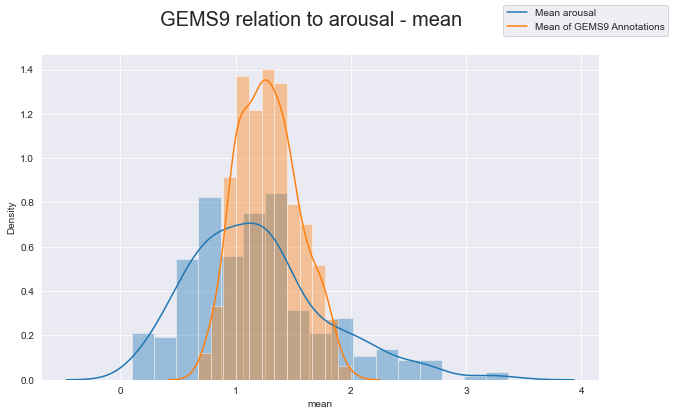

In [223]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMS9 relation to arousal - mean', fontsize=20)
sns.distplot(df_gems_grouped['arousal'])
sns.distplot(df_gems_grouped['mean'])
fig.legend(labels=['Mean arousal','Mean of GEMS9 Annotations'])
plt.show()

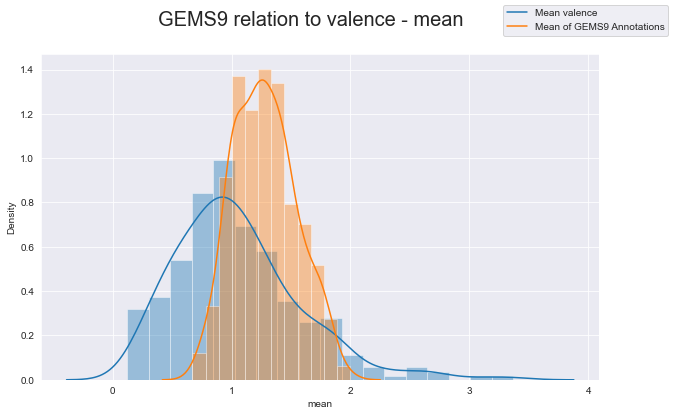

In [224]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMS9 relation to valence - mean', fontsize=20)
sns.distplot(df_gems_grouped['valence'])
sns.distplot(df_gems_grouped['mean'])
fig.legend(labels=['Mean valence','Mean of GEMS9 Annotations'])
plt.show()

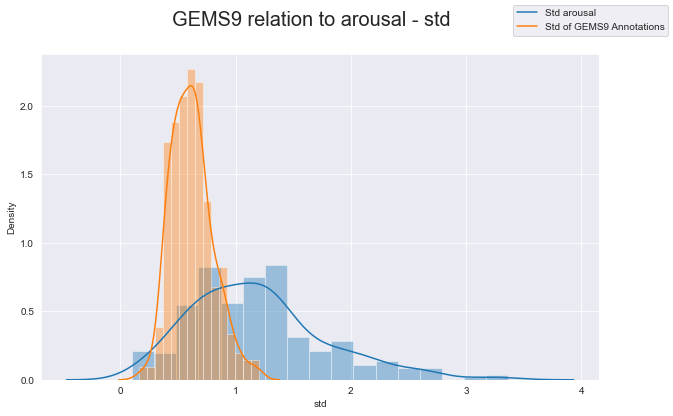

In [225]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMS9 relation to arousal - std', fontsize=20)
sns.distplot(df_gems_grouped['arousal'])
sns.distplot(df_gems_grouped['std'])
fig.legend(labels=['Std arousal','Std of GEMS9 Annotations'])
plt.show()

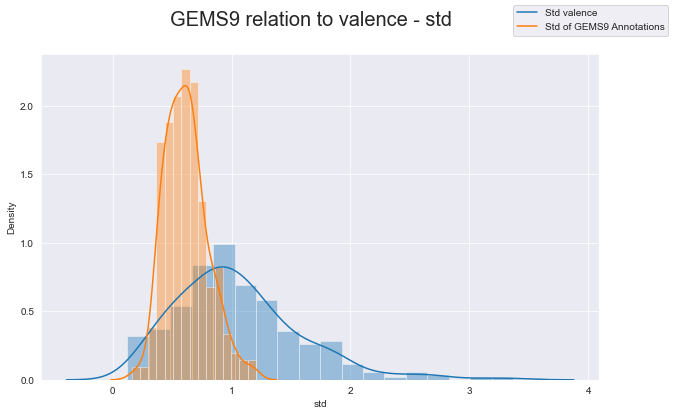

In [226]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMS9 relation to valence - std', fontsize=20)
sns.distplot(df_gems_grouped['valence'])
sns.distplot(df_gems_grouped['std'])
fig.legend(labels=['Std valence','Std of GEMS9 Annotations'])
plt.show()

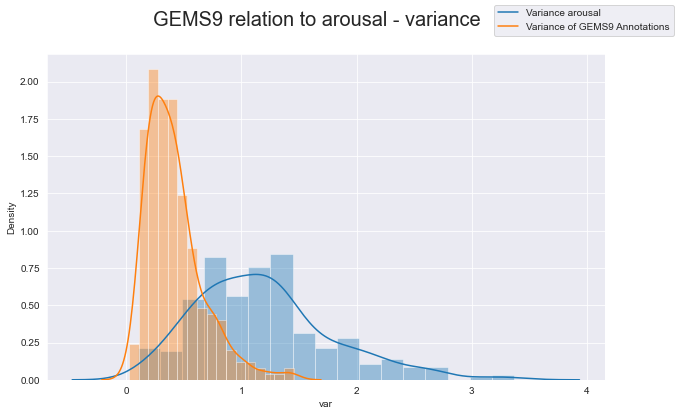

In [227]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMS9 relation to arousal - variance', fontsize=20)
sns.distplot(df_gems_grouped['arousal'])
sns.distplot(df_gems_grouped['var'])
fig.legend(labels=['Variance arousal','Variance of GEMS9 Annotations'])
plt.show()

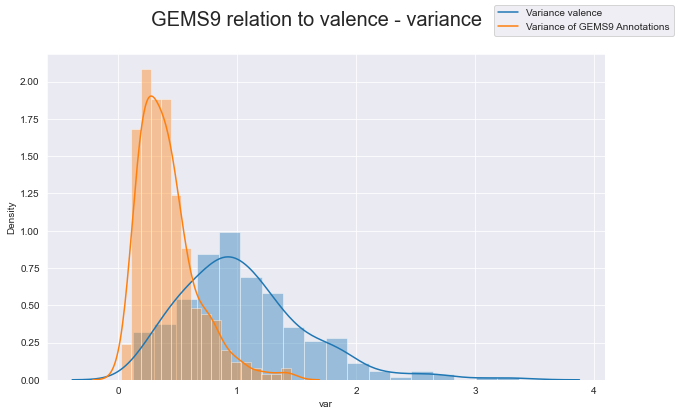

In [228]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMS9 relation to valence - variance', fontsize=20)
sns.distplot(df_gems_grouped['valence'])
sns.distplot(df_gems_grouped['var'])
fig.legend(labels=['Variance valence','Variance of GEMS9 Annotations'])
plt.show()

<h1>GEMMES</h1>
<h2>Create data frame for GEMMES annotations</h2>

In [229]:
df_gemmes = df_annotations[["aggregate", "arousal", "valence", "gemmes_flow", "gemmes_movement", "gemmes_force", "gemmes_interior", "gemmes_wandering"]]
df_gemmes

,aggregate,arousal,valence,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,1,-1,3,2,1,1.0,2
1,1,2,-1,3,2,2,3.0,3
2,1,2,0,3,2,1,1.0,4
3,1,2,2,5,1,2,2.0,5
4,1,4,2,4,1,2,3.0,1
...,...,...,...,...,...,...,...,...
2633,42,3,-1,4,2,2,5.0,3
2634,42,2,0,2,3,2,1.0,1
2635,42,2,1,2,2,1,2.0,2
2636,42,2,0,2,3,3,1.0,1


<h2>Group data by the aggregated column and take the variance</h2>

In [230]:
df_gemmes_grouped = df_gemmes.groupby(["aggregate"]).var()
df_gemmes_grouped

,arousal,valence,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
aggregate,,,,,,,
1,1.290909,1.163636,0.563636,0.600000,1.290909,1.690909,1.472727
2,0.963636,0.563636,0.818182,1.090909,1.672727,1.763636,0.454545
3,1.254545,1.054545,1.254545,1.363636,1.490909,2.090909,0.890909
4,0.763636,0.254545,1.418182,0.872727,1.072727,1.654545,1.563636
5,0.818182,0.872727,1.400000,1.072727,1.290909,0.654545,0.818182
...,...,...,...,...,...,...,...
293,0.800000,0.400000,1.466667,1.466667,0.666667,3.866667,1.766667
294,1.866667,0.966667,1.766667,1.900000,1.466667,0.966667,0.666667
295,2.666667,0.266667,1.900000,1.466667,1.866667,0.666667,2.266667


<h2>Calculate the mean/std/var of the GEMMES annoatations in a new column from variance grouped data</h2>

In [231]:
col = df_gemmes_grouped.loc[: , "gemmes_flow":"gemmes_wandering"]
df_gemmes_grouped['mean'] = col.mean(axis=1)
df_gemmes_grouped['std'] = col.std(axis=1)
df_gemmes_grouped['var'] = col.var(axis=1)
df_gemmes_grouped[['mean', 'std', 'var']]

,mean,std,var
aggregate,,,
1,1.123636,0.514645,0.264860
2,1.160000,0.558244,0.311636
3,1.418182,0.437499,0.191405
4,1.316364,0.332434,0.110512
5,1.047273,0.312706,0.097785
...,...,...,...
293,1.846667,1.200833,1.442000
294,1.353333,0.525251,0.275889
295,1.633333,0.610100,0.372222


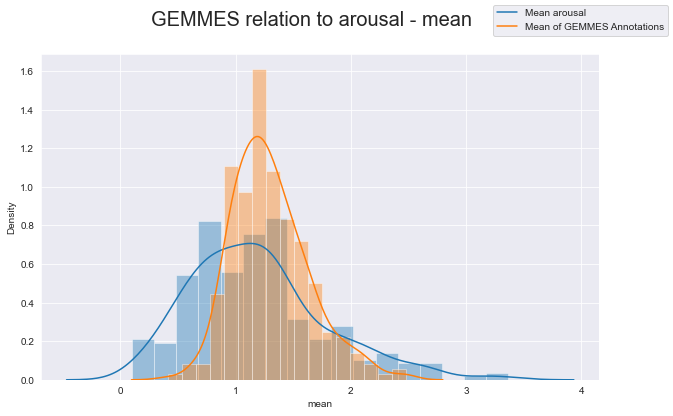

In [232]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMMES relation to arousal - mean', fontsize=20)
sns.distplot(df_gemmes_grouped['arousal'])
sns.distplot(df_gemmes_grouped['mean'])
fig.legend(labels=['Mean arousal','Mean of GEMMES Annotations'])
plt.show()

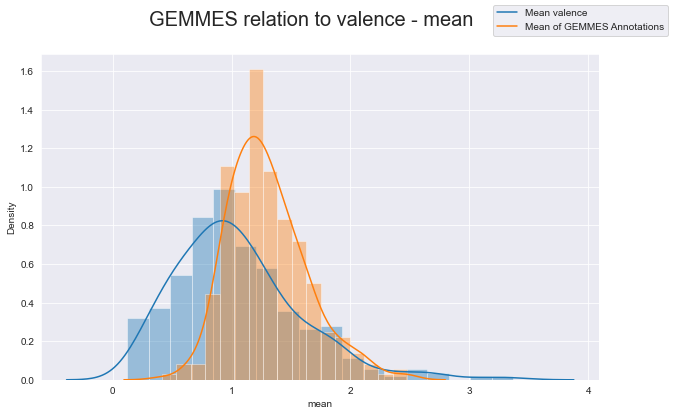

In [233]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMMES relation to valence - mean', fontsize=20)
sns.distplot(df_gemmes_grouped['valence'])
sns.distplot(df_gemmes_grouped['mean'])
fig.legend(labels=['Mean valence','Mean of GEMMES Annotations'])
plt.show()

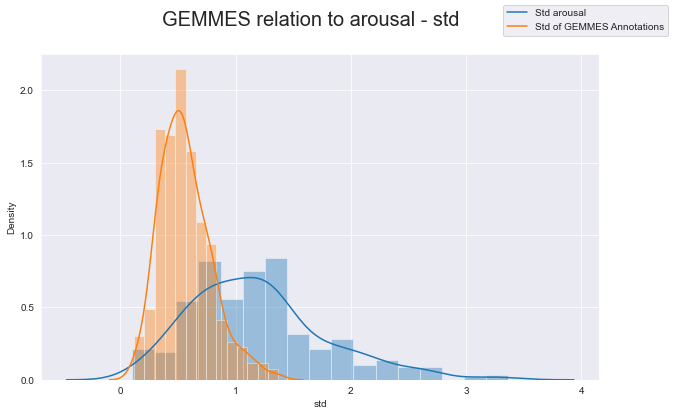

In [234]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMMES relation to arousal - std', fontsize=20)
sns.distplot(df_gemmes_grouped['arousal'])
sns.distplot(df_gemmes_grouped['std'])
fig.legend(labels=['Std arousal','Std of GEMMES Annotations'])
plt.show()

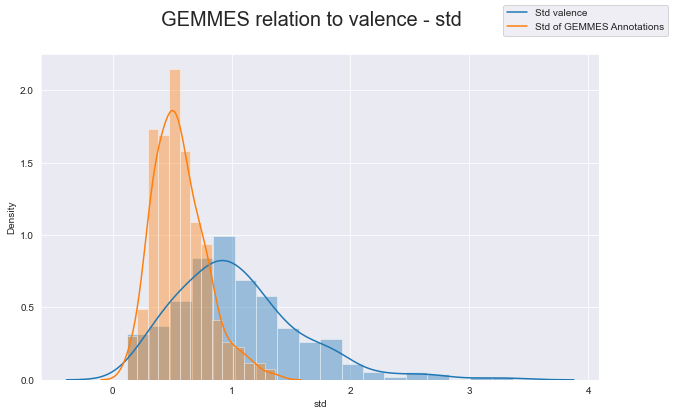

In [235]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMMES relation to valence - std', fontsize=20)
sns.distplot(df_gemmes_grouped['valence'])
sns.distplot(df_gemmes_grouped['std'])
fig.legend(labels=['Std valence','Std of GEMMES Annotations'])
plt.show()

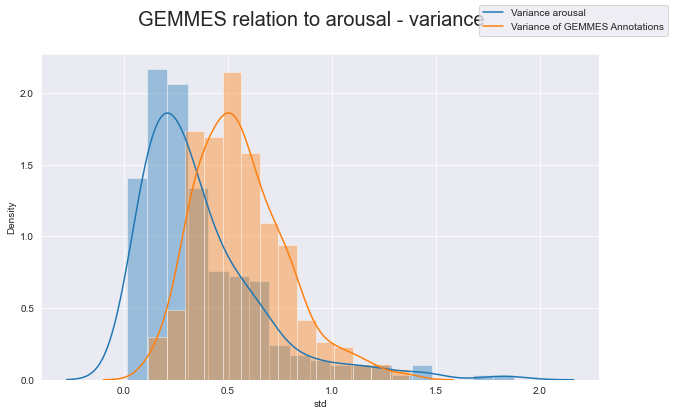

In [237]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMMES relation to arousal - variance', fontsize=20)
sns.distplot(df_gemmes_grouped['var'])
sns.distplot(df_gemmes_grouped['std'])
fig.legend(labels=['Variance arousal','Variance of GEMMES Annotations'])
plt.show()

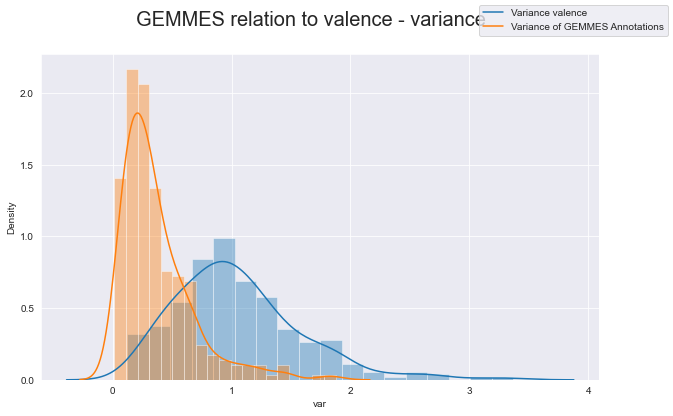

In [238]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('GEMMES relation to valence - variance', fontsize=20)
sns.distplot(df_gemmes_grouped['valence'])
sns.distplot(df_gemmes_grouped['var'])
fig.legend(labels=['Variance valence','Variance of GEMMES Annotations'])
plt.show()